/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Model training and prediction completed successfully!


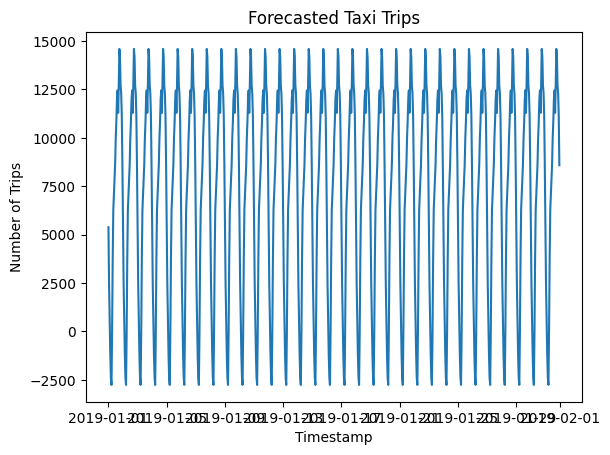

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import pickle
import matplotlib.pyplot as plt


training_data_url = "https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv"
training_data = pd.read_csv(training_data_url)


training_data.rename(columns={'Timestamp': 'timestamp'}, inplace=True)


training_data['timestamp'] = pd.to_datetime(training_data['timestamp'])
training_data.set_index('timestamp', inplace=True)
training_data = training_data.asfreq('h')

target_variable = training_data['trips']

model_es = ExponentialSmoothing(target_variable, seasonal='add', seasonal_periods=24)
fitted_model = model_es.fit()
with open("trained_model.pkl", "wb") as model_file:
    pickle.dump(fitted_model, model_file)
test_data_url = "https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_test.csv"
test_data = pd.read_csv(test_data_url)

test_data.rename(columns={'Timestamp': 'timestamp'}, inplace=True)

test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data.set_index('timestamp', inplace=True)

test_data = test_data.asfreq('h')

forecast_duration = 744
forecasted_values = fitted_model.forecast(steps=forecast_duration)
forecasted_values.to_csv("forecasted_predictions.csv")

print("Model training and prediction completed successfully!")

forecasted_values = pd.read_csv("forecasted_predictions.csv", index_col=0)
forecasted_values.index = pd.to_datetime(forecasted_values.index)

plt.plot(forecasted_values)
plt.title("Forecasted Taxi Trips")
plt.xlabel("Timestamp")
plt.ylabel("Number of Trips")
plt.show()
